<a href="https://colab.research.google.com/github/pradeepdhayanandan/colab_projects/blob/main/Walmart_Business_Case_Study_Pradeep_D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart_Business_Case_Study_Pradeep_D**

## **Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers like Do women spend more on Black Friday than men? etc.




## **Installation of all packages and importing all the libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## **Importing the files from the drive**

In [ ]:
!gdown 10hHtbaTAhPtyiqCAc0zLLI4UEEfGQCEt

df = pd.read_csv('walmart_data.csv')

Downloading...
From: https://drive.google.com/uc?id=10hHtbaTAhPtyiqCAc0zLLI4UEEfGQCEt
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 70.4MB/s]


In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Pre-Processing the Data**

### **Checking for Duplicates, Null values & performing basic analysis**

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df[df.duplicated()] # checking for duplicates and no duplicate values are present

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df.isnull().sum() # No null values are present columns

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
 df.isna().sum() | (df == '').sum() # No missing/blank values are present in columns

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
# Determining the shape, datatype, missing values and statistical summary, info of the attributes in the dataset:

print(f"Shape of the data is {df.shape}\n")
print(f"Data types of the attributes:\n{df.dtypes}\n")
print(f"Total Missing values:\n{df.isnull().sum()}\n")
print(f"Statistical summary of the data:\n{df.describe()}\n")
print(f"Data info of the attributes:\n{df.info()}\n")

Shape of the data is (550068, 10)

Data types of the attributes:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Total Missing values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Statistical summary of the data:
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+

In [ ]:
#Converting these categorical attributes ('User_ID', 'Occupation', 'Marital_Status', 'Product_Category') into object datatype

df[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']] = df[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']].astype(object)

In [ ]:
df.dtypes

,0
User_ID,object
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


## **Finding the counts of each categorical variable both using graphical and non-graphical analysis.**

### **Non-Graphical Analysis/Value Counts for Categorical variables**

In [ ]:
val = df
for column in val.columns:
  if val[column].dtype == 'object':
    print(f"\ncolumn:{column}")
    print(f"Value_counts:{df[column].value_counts()}")



column:User_ID
Value_counts:User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1004991       7
1005391       7
1000094       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64

column:Product_ID
Value_counts:Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00325342       1
P00312542       1
P00008942       1
P00315142       1
P00365942       1
Name: count, Length: 3631, dtype: int64

column:Gender
Value_counts:Gender
M    414259
F    135809
Name: count, dtype: int64

column:Age
Value_counts:Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

column:Occupation
Value_counts:Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15 

### **Non-Graphical Analysis / unique attributes for Categorical variables**

In [ ]:
# Finding the unique values for the categorical variables

val = df
for column in val.columns:
  if val[column].dtypes == 'object':
      print(f"\ncolumn:{column}")
      print(f"Value_counts:{df[column].nunique()}")


column:User_ID
Value_counts:5891

column:Product_ID
Value_counts:3631

column:Gender
Value_counts:2

column:Age
Value_counts:7

column:Occupation
Value_counts:21

column:City_Category
Value_counts:3

column:Stay_In_Current_City_Years
Value_counts:5

column:Marital_Status
Value_counts:2

column:Product_Category
Value_counts:20


## **Graphical analysis of the categorical attributes**

## **Univariate & Bivariate Analysis**

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### **Histogram**

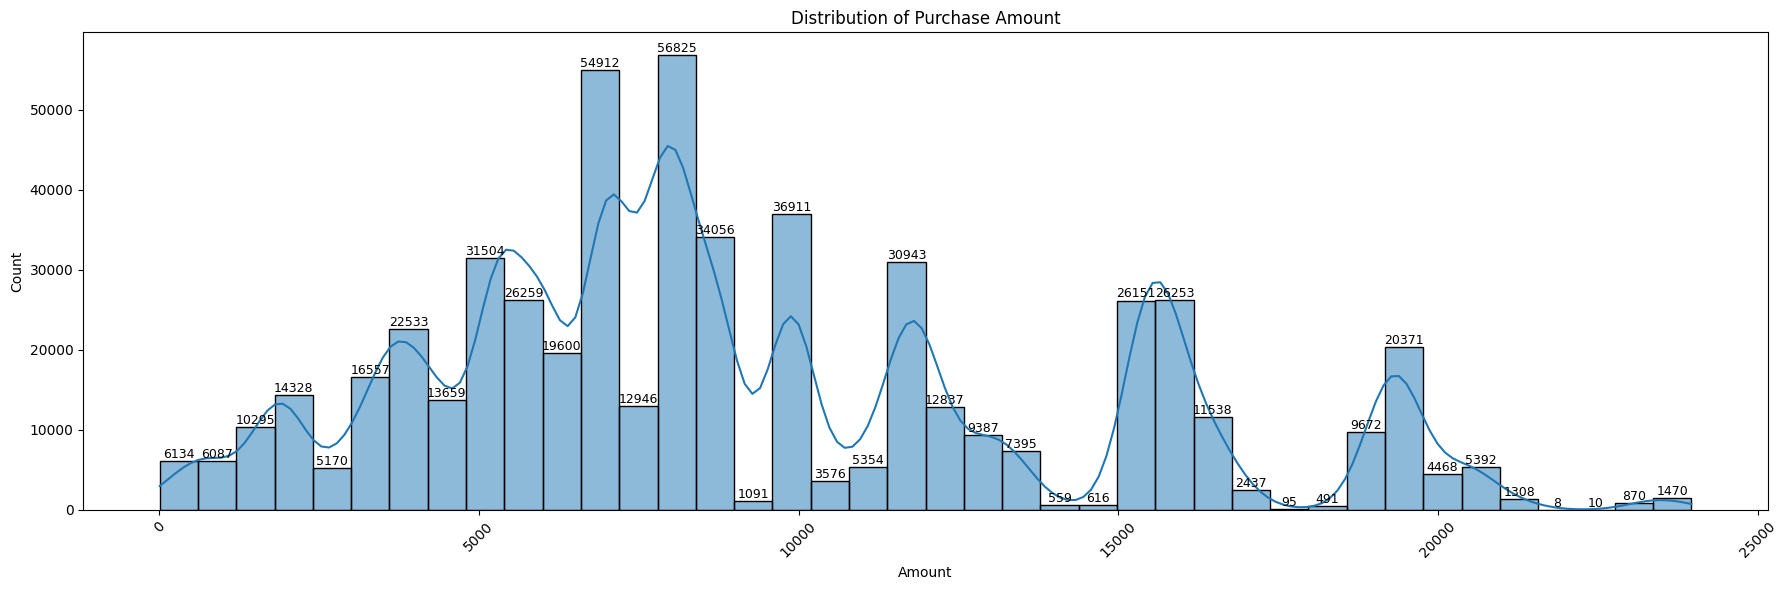

In [ ]:
plt.figure(figsize=(18, 6))
ax = sns.histplot(data=df, x='Purchase', bins=40, kde=True)
for p in ax.patches:
  height = p.get_height()
  if height > 0:
      ax.text(
        p.get_x() + p.get_width() / 2,
        height + 10,
        int(height),
        ha = 'center',
        va = 'bottom',
        fontsize = 9
      )

plt.title('Distribution of Purchase Amount')
plt.xlabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Distplot**

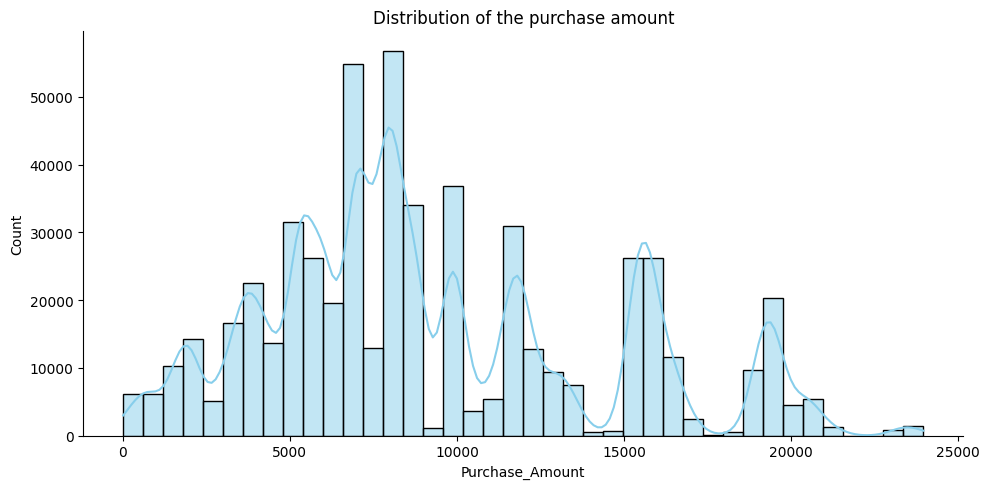

In [ ]:
sns.displot(data=df, x='Purchase', bins=40, kde=True, aspect=2, height=5, color='skyblue')
plt.title('Distribution of the purchase amount')
plt.xlabel('Purchase_Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### **INSIGHTS**:
* The purchase amount distribution is with most transactions between 5,000 and 15,000.

* Multiple peaks suggest common basket values or pricing strategies.

* High-value outliers (above ₹20,000) exist but are rare.

### **Count Plot**

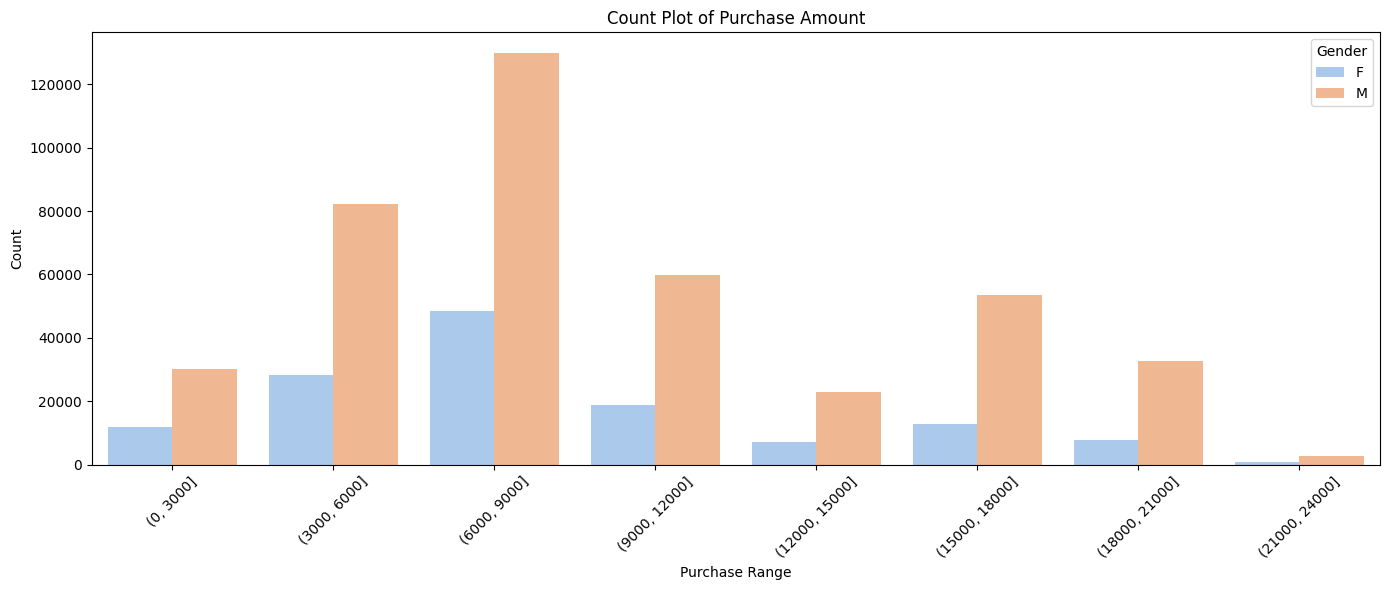

In [ ]:
# Since the values are huge and overcrowded binning the purchase column before plotting
bin_values = np.arange(0, 27000, 3000)
df['Purchase_Binned'] = pd.cut(df['Purchase'], bins=bin_values)

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='Purchase_Binned', hue='Gender', palette='pastel', legend=True)

plt.title('Count Plot of Purchase Amount')
plt.xlabel('Purchase Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**INSIGHTS:**

i)  Males are making more purchases compared to females across all purchase ranges.

ii) The highest concentration of purchases is in the 6000-9000 range.

iii) High-value purchases (above 18,000) are limited.

### **Box Plot**

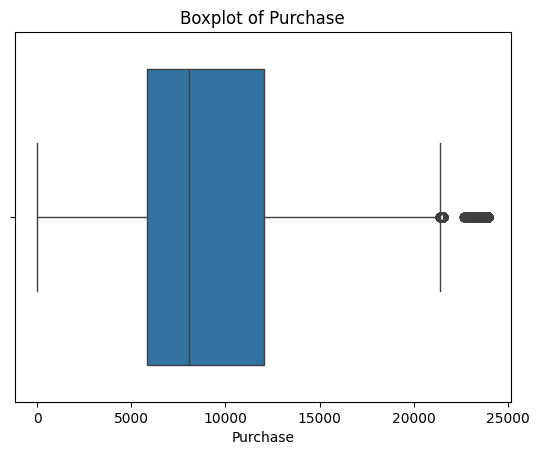

In [ ]:
sns.boxplot(data=df, x='Purchase') # Boxplot to detect the outliers in the purchase column
plt.title('Boxplot of Purchase')
plt.show()

**INSIGHTS:**
* In general purchases above 21000 are considered to be an outlier.

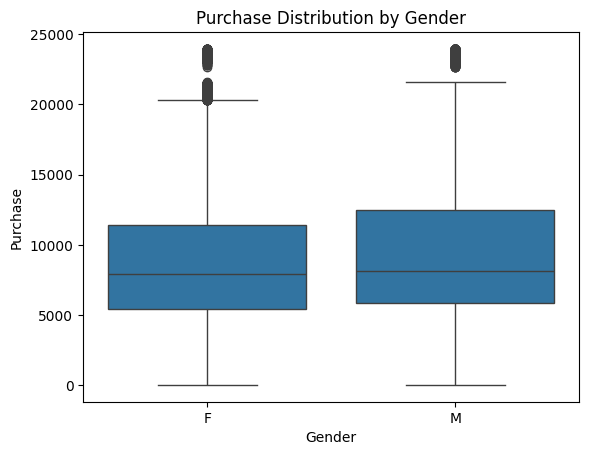

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)   #boxplot to detect the outlier in purchase with respect to the gender
plt.title('Purchase Distribution by Gender')
plt.show()

**INSIGHTS:**

- For Female purchases the outlier falls above 20000 and for Male purchases the outlier falls above 21000 In general purchases above 21000 are considered to be an outlier.

- Comparatively the female(F) has more outlier purchases than male(M).

Text(0.5, 1.0, 'Purchase Distribution by Marital Status')

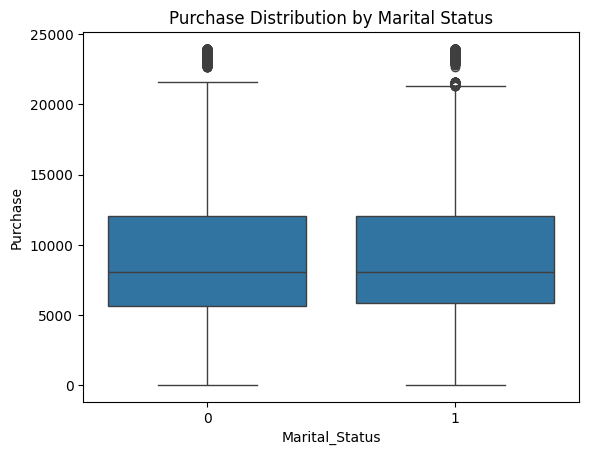

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df) #boxplot to detect the outlier in purchase with respect to the marital status.
plt.title('Purchase Distribution by Marital Status')

**INSIGHTS:**

- The median purchase amount is similar between married and unmarried customers, indicating comparable average spending.
- The spread (IQR) is also similar, suggesting no major difference in variability.
- High-value outliers are present in both groups, with slightly higher values in the married segment.
- Marital status does not significantly affect spending behavior.


Text(0.5, 1.0, 'Purchase Distribution by Age')

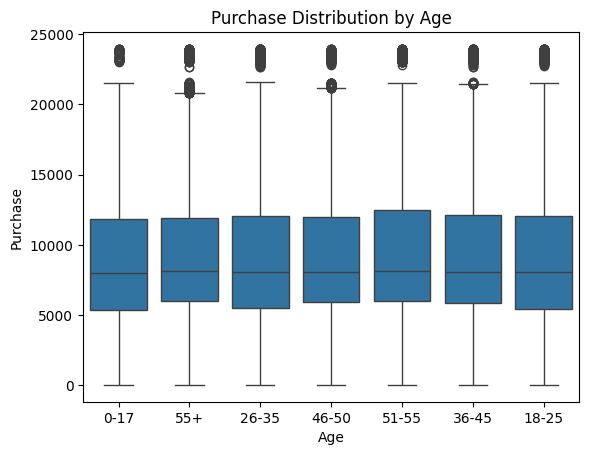

In [ ]:
sns.boxplot(x='Age', data=df, y='Purchase') #boxplot to detect the outlier in purchase with respect to the age.
plt.title('Purchase Distribution by Age')

**INSIGHTS:**

- Median purchase amounts are consistent across all age bins, indicating uniform average spending behavior. Variability in purchase (IQR) is also similar.
- Outliers exist across all age groups, meaning exceptional spenders are not limited to a specific age.
- Age does not have a strong influence on average purchase behavior.

In [ ]:
df.groupby('Marital_Status')['Purchase'].sum()  #Analysing the purchase based on the marital status.

,Purchase
Marital_Status,
0,3008927447
1,2086885295


In [ ]:
df.groupby('Gender')['Purchase'].describe() #Analysing statistical summary of the dataset with respect to gender.

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.groupby('Gender')['Purchase'].mean() #Average / mean spend by gender

,Purchase
Gender,
F,8734.565765
M,9437.526040


**INSIGHTS:**

i) The median purchase is in the range of 7000.

ii) For Female purchases the outlier falls above 20000 and for Male purchases the outlier falls above 21000 In general purchases above 21000 are considered to be an outlier.

iii) Comparatively the female has more outlier purchases than male.

iv) The most of the outlier purchases are made by the age group 55 and above.

v) The mean purchase of Male(9437.52) is comparatively higher than the mean purchase of the female(8734.56).

vi) The count of purchases made by males(414259) is very much higher compared to the count of purchases made by females(135809).

vii) Purchase amount shows outliers on the higher side across all age groups.

viii) These outliers may represent high end product buyers or bulk purchases.


### **Heatmaps**

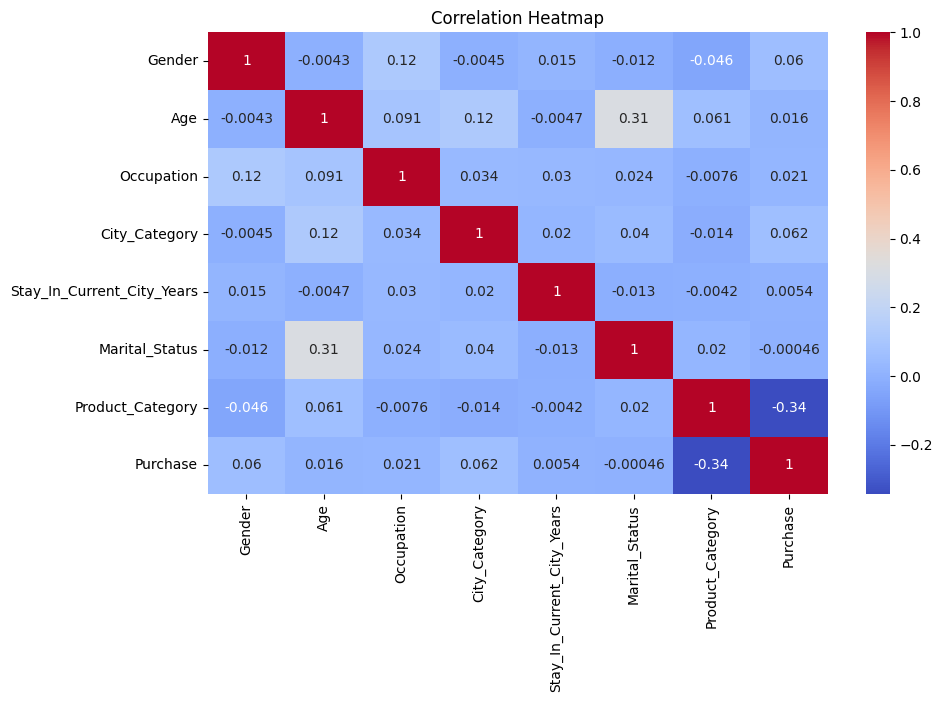

In [ ]:
df_corr = df.copy()

# Dropping non-numeric and binned columns
df_corr.drop(['User_ID', 'Product_ID', 'Purchase_Binned'], axis=1, inplace=True)

# Converting categorical columns to numbers
for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**INSIGHTS:**

i) Product_Category is moderately negatively correlated with Purchase (-0.34), suggesting that certain product categories are associated with lower purchase amounts.

ii) There is no strong correlation between Purchase and demographic variables like Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, and Marital_Status. The correlation values are all very low, indicating that purchase behavior is not strongly influenced by these factors individually.

iii) Marital_Status and Age have a moderate positive correlation (0.31).


### **Pair Plot**

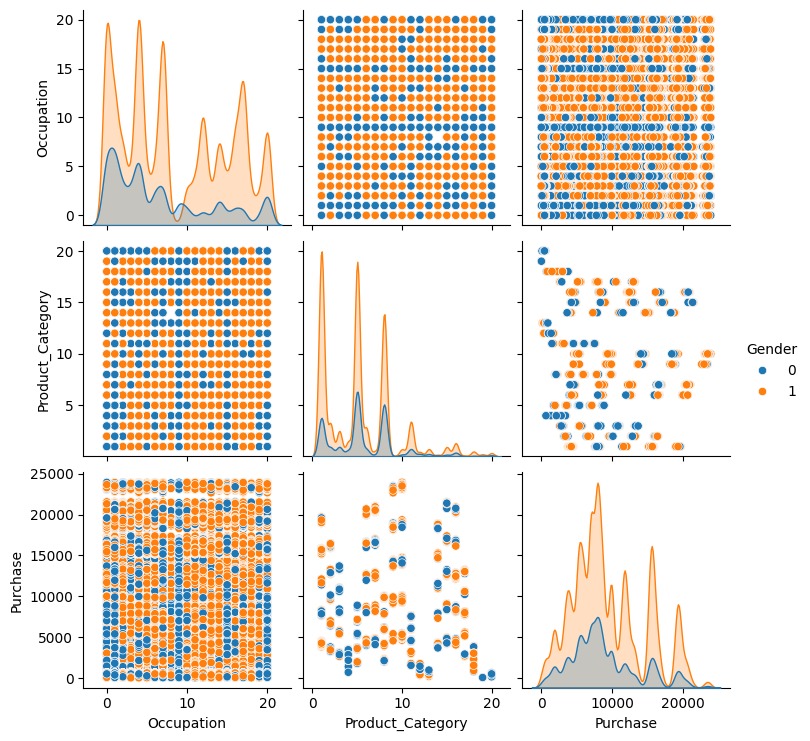

In [ ]:
df_plot = df[['Gender', 'Occupation', 'Product_Category', 'Purchase']].copy()

# Converting categorical columns to numbers
df_plot['Gender'] = df_plot['Gender'].astype('category').cat.codes

# Now plot using the copy
sns.pairplot(df_plot, hue='Gender')
plt.show()



**Gender:**

0 - Female

1- Male

**INSIGHTS:**

i) From the pair plot, we observe that male customers tend to spend slightly more on average than female customers.

ii) There is no strong correlation between occupation and purchase, indicating that customer spending is not significantly impacted by profession.

iii) Most purchases are concentrated in a few product categories.

iv) Gender-wise, the distribution across product categories and occupations is fairly balanced.

## **Central Limit Theorem (CLT)**

The Central Limit Theorem allows us to assume that the sampling distribution of the mean is approximately normal, even if the population distribution is not. This enabling us to estimate population parameters from sample data using confidence intervals.

In [ ]:
# Function for computing Confidence interval based on Gender

def compute_ci(data, confidence, n_samples):
    rng = np.random.default_rng(seed=42)
    sample = rng.choice(data, size=n_samples, replace=True)
    mean = sample.mean()
    se = sample.std(ddof=1) / np.sqrt(n_samples)
    interval = stats.norm.interval(confidence, loc=mean, scale=se)
    return f"{mean:.2f}", f"({interval[0]:.2f}, {interval[1]:.2f})"

# Splitting male and female datasets
df_female = df[df['Gender'] == 'F']
df_male = df[df['Gender'] == 'M']

# Loop for different sample sizes and confidence levels
for n in [100, 500, 1000]:
    for confid in [0.90, 0.95, 0.99]:
        f_mean, f_ci = compute_ci(df_female['Purchase'], confidence=confid, n_samples=n)
        m_mean, m_ci = compute_ci(df_male['Purchase'], confidence=confid, n_samples=n)

        print(f"Sample Size = {n}, Confidence Level = {int(confid*100)}%")
        print(f"    Female Mean: {f_mean} | CI: {f_ci}")
        print(f"    Male   Mean: {m_mean} | CI: {m_ci}\n")

Sample Size = 100, Confidence Level = 90%
    Female Mean: 9255.41 | CI: (8473.68, 10037.14)
    Male   Mean: 9755.03 | CI: (8902.75, 10607.31)

Sample Size = 100, Confidence Level = 95%
    Female Mean: 9255.41 | CI: (8323.92, 10186.90)
    Male   Mean: 9755.03 | CI: (8739.48, 10770.58)

Sample Size = 100, Confidence Level = 99%
    Female Mean: 9255.41 | CI: (8031.22, 10479.60)
    Male   Mean: 9755.03 | CI: (8420.37, 11089.69)

Sample Size = 500, Confidence Level = 90%
    Female Mean: 8902.77 | CI: (8549.35, 9256.19)
    Male   Mean: 9469.02 | CI: (9096.07, 9841.97)

Sample Size = 500, Confidence Level = 95%
    Female Mean: 8902.77 | CI: (8481.65, 9323.90)
    Male   Mean: 9469.02 | CI: (9024.63, 9913.42)

Sample Size = 500, Confidence Level = 99%
    Female Mean: 8902.77 | CI: (8349.32, 9456.23)
    Male   Mean: 9469.02 | CI: (8884.99, 10053.06)

Sample Size = 1000, Confidence Level = 90%
    Female Mean: 8663.24 | CI: (8419.49, 8906.98)
    Male   Mean: 9362.33 | CI: (9095.52, 9

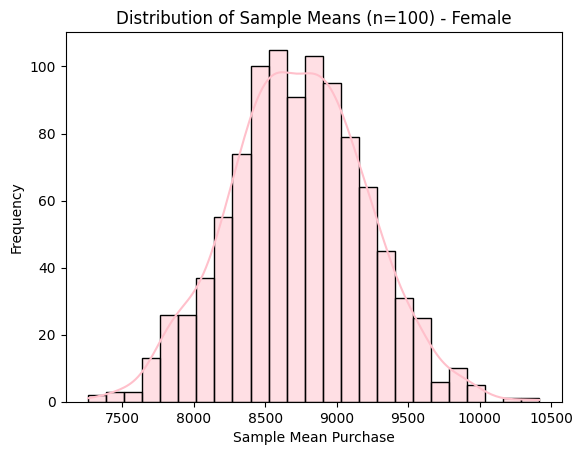

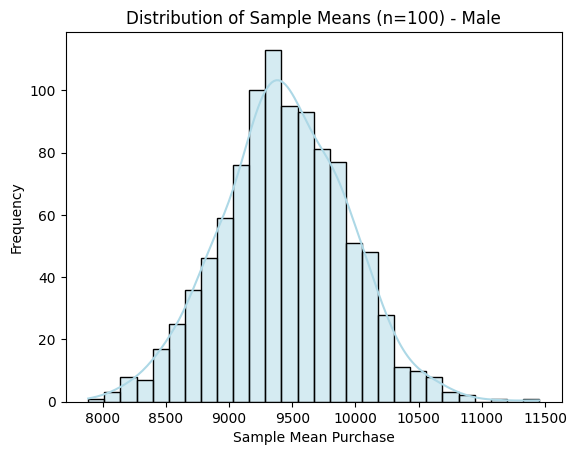

In [ ]:
#plotting histplot for sample means (n=100) - Gender

# Female Customers
sample_means_female = [np.mean(np.random.choice(df[df['Gender'] == 'F']['Purchase'], 100, replace=True)) for _ in range(1000)]
sns.histplot(sample_means_female, kde=True, color='pink')
plt.title("Distribution of Sample Means (n=100) - Female")
plt.xlabel("Sample Mean Purchase")
plt.ylabel("Frequency")
plt.show()

# Male Customers
sample_means_male = [np.mean(np.random.choice(df[df['Gender'] == 'M']['Purchase'], 100, replace=True)) for _ in range(1000)]
sns.histplot(sample_means_male, kde=True, color='lightblue')
plt.title("Distribution of Sample Means (n=100) - Male")
plt.xlabel("Sample Mean Purchase")
plt.ylabel("Frequency")
plt.show()



**INSIGHTS:**

* As sample size increases, the confidence intervals become narrower, confirming the Central Limit Theorem.

* The sample mean plots for gender show an approximately normal distribution, consistent with the Central Limit Theorem.

* Female customers have slightly lower average spend compared to males, but their intervals may overlap depending on sample size and confidence level.

* 99% CIs are widest and safest for inference but less precise.

In [ ]:
# Function for computing Confidence interval based on Marital Status

def compute_ci(data, confidence, n_samples):
    rng = np.random.default_rng(seed=42)
    sample = rng.choice(data, size=n_samples, replace=True)
    mean = sample.mean()
    se = sample.std(ddof=1) / np.sqrt(n_samples)
    interval = stats.norm.interval(confidence, loc=mean, scale=se)
    interval = (round(interval[0], 2), round(interval[1], 2))
    return mean, interval

df_married = df[df['Marital_Status'] == 1]
df_unmarried = df[df['Marital_Status'] == 0]

print("Confidence Intervals by Marital Status\n")
for n in [100, 500, 1000]:
    for confid in [0.90, 0.95, 0.99]:
        married_mean, married_ci = compute_ci(df_married['Purchase'], confidence=confid, n_samples=n)
        unmarried_mean, unmarried_ci = compute_ci(df_unmarried['Purchase'], confidence=confid, n_samples=n)

        print(f"Sample Size = {n}, Confidence Level = {int(confid*100)}%")
        print(f"    Married   Mean: {married_mean} | CI: {married_ci}")
        print(f"    Unmarried Mean: {unmarried_mean} | CI: {unmarried_ci}\n")


Confidence Intervals by Marital Status

Sample Size = 100, Confidence Level = 90%
    Married   Mean: 9757.04 | CI: (np.float64(8892.6), np.float64(10621.48))
    Unmarried Mean: 9767.83 | CI: (np.float64(8877.84), np.float64(10657.82))

Sample Size = 100, Confidence Level = 95%
    Married   Mean: 9757.04 | CI: (np.float64(8727.0), np.float64(10787.08))
    Unmarried Mean: 9767.83 | CI: (np.float64(8707.35), np.float64(10828.31))

Sample Size = 100, Confidence Level = 99%
    Married   Mean: 9757.04 | CI: (np.float64(8403.33), np.float64(11110.75))
    Unmarried Mean: 9767.83 | CI: (np.float64(8374.12), np.float64(11161.54))

Sample Size = 500, Confidence Level = 90%
    Married   Mean: 9615.038 | CI: (np.float64(9240.47), np.float64(9989.61))
    Unmarried Mean: 9008.168 | CI: (np.float64(8636.08), np.float64(9380.26))

Sample Size = 500, Confidence Level = 95%
    Married   Mean: 9615.038 | CI: (np.float64(9168.71), np.float64(10061.36))
    Unmarried Mean: 9008.168 | CI: (np.float6

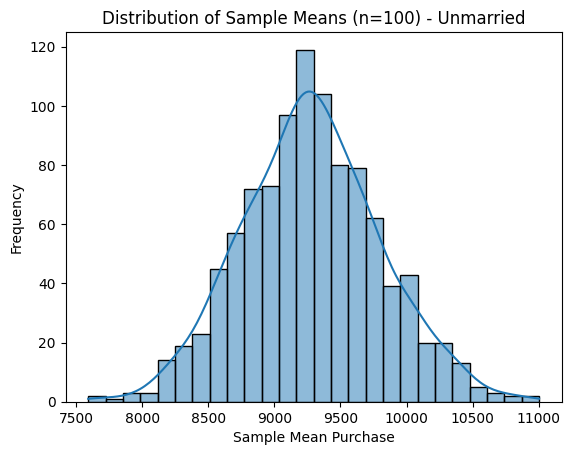

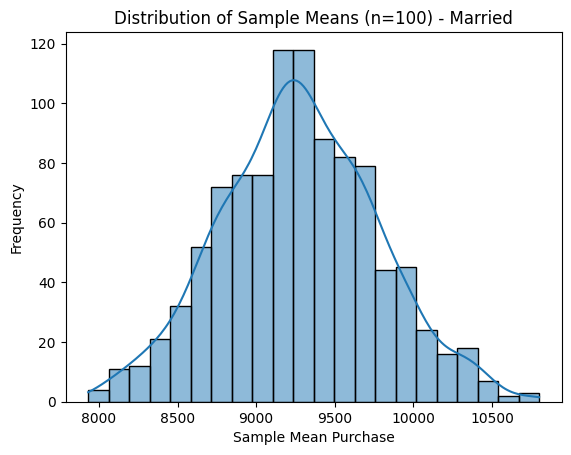

In [ ]:
#plotting histplot for sample means (n=100)

# Marital Status - Unmarried (0)
sample_means_unmarried = [np.mean(np.random.choice(df[df['Marital_Status'] == 0]['Purchase'], 100, replace=True)) for _ in range(1000)]
sns.histplot(sample_means_unmarried, kde=True)
plt.title("Distribution of Sample Means (n=100) - Unmarried")
plt.xlabel("Sample Mean Purchase")
plt.ylabel("Frequency")
plt.show()

# Marital Status - Married (1)
sample_means_married = [np.mean(np.random.choice(df[df['Marital_Status'] == 1]['Purchase'], 100, replace=True)) for _ in range(1000)]
sns.histplot(sample_means_married, kde=True)
plt.title("Distribution of Sample Means (n=100) - Married")
plt.xlabel("Sample Mean Purchase")
plt.ylabel("Frequency")
plt.show()


**INSIGHTS:**

* The average purchase amount is similar between married and unmarried customers.

* The sample mean plots for marital status show an approximately normal distribution, consistent with the Central Limit Theorem.

* Confidence intervals for both groups tend to overlap, indicating similar purchase behaviors.

* No strong purchasing difference based on marital status.

In [ ]:
# Function for computing Confidence interval based on age group

def compute_ci(data, confidence, n_samples):
    rng = np.random.default_rng(seed=42)
    sample = rng.choice(data, size=n_samples, replace=True)
    mean = round(sample.mean(), 2)
    se = sample.std(ddof=1) / np.sqrt(n_samples)
    interval = stats.norm.interval(confidence, loc=mean, scale=se)
    interval = (round(interval[0], 2), round(interval[1], 2))
    return mean, interval

# calculate for different samples and different confidence levels

for n in [100, 500, 1000]:
    for confid in [0.90, 0.95, 0.99]:
        print(f"\n Sample Size = {n}, Confidence Level = {int(confid * 100)}% ")
        for grp in sorted(df['Age'].dropna().unique()):  # Sorted for readability
            group_data = df[df['Age'] == grp]['Purchase']
            if len(group_data) >= n:
                mean, age_ci = compute_ci(group_data, confidence=confid, n_samples=n)
                print(f"  Age Group: {grp:<7} | Mean: {mean:.2f} | CI: {age_ci}")
            else:
                print(f"  Age Group: {grp:<7} | Not enough data for n={n}")



 Sample Size = 100, Confidence Level = 90% 
  Age Group: 0-17    | Mean: 8274.99 | CI: (np.float64(7516.17), np.float64(9033.81))
  Age Group: 18-25   | Mean: 9408.87 | CI: (np.float64(8544.33), np.float64(10273.41))
  Age Group: 26-35   | Mean: 9836.29 | CI: (np.float64(9082.29), np.float64(10590.29))
  Age Group: 36-45   | Mean: 9238.78 | CI: (np.float64(8376.2), np.float64(10101.36))
  Age Group: 46-50   | Mean: 9473.94 | CI: (np.float64(8580.39), np.float64(10367.49))
  Age Group: 51-55   | Mean: 9474.24 | CI: (np.float64(8648.55), np.float64(10299.93))
  Age Group: 55+     | Mean: 9491.28 | CI: (np.float64(8607.53), np.float64(10375.03))

 Sample Size = 100, Confidence Level = 95% 
  Age Group: 0-17    | Mean: 8274.99 | CI: (np.float64(7370.8), np.float64(9179.18))
  Age Group: 18-25   | Mean: 9408.87 | CI: (np.float64(8378.7), np.float64(10439.04))
  Age Group: 26-35   | Mean: 9836.29 | CI: (np.float64(8937.84), np.float64(10734.74))
  Age Group: 36-45   | Mean: 9238.78 | CI: (n

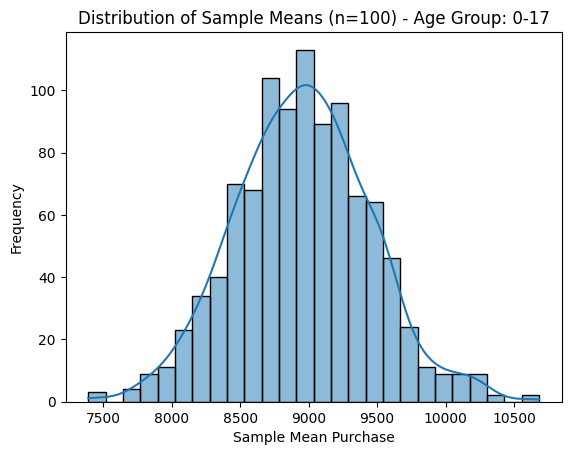

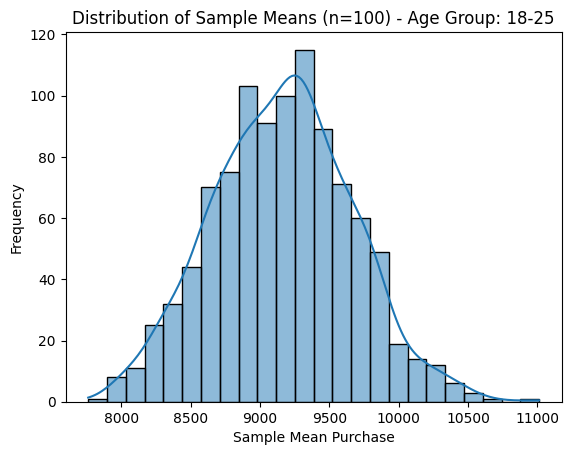

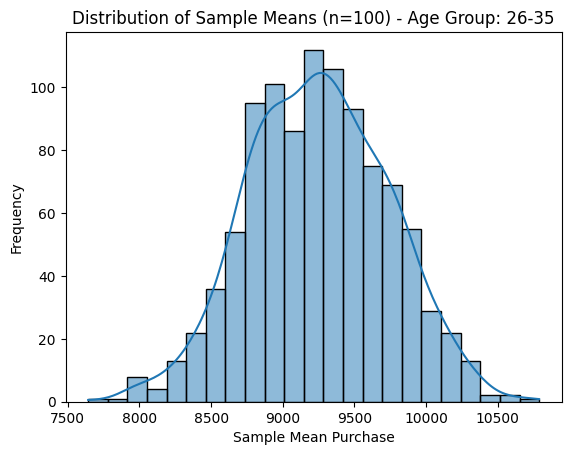

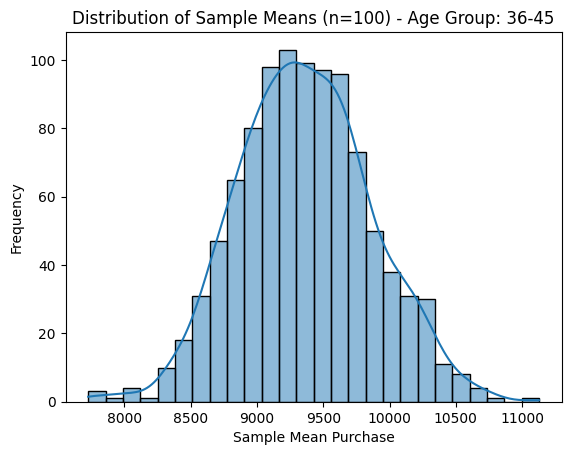

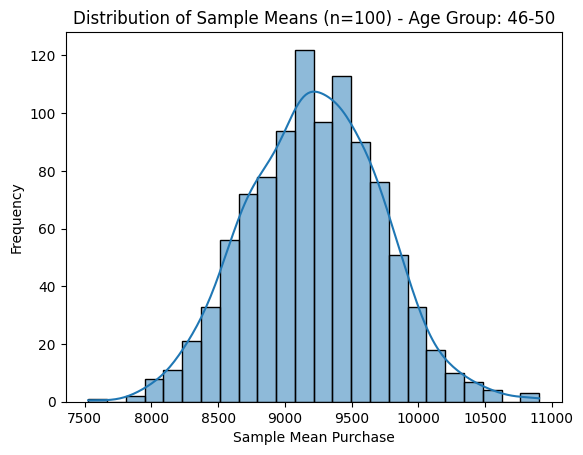

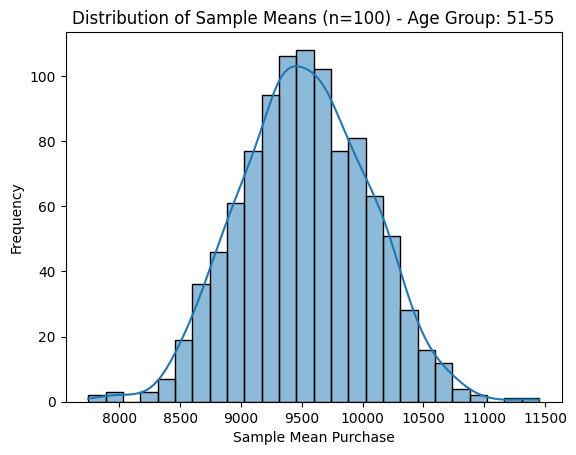

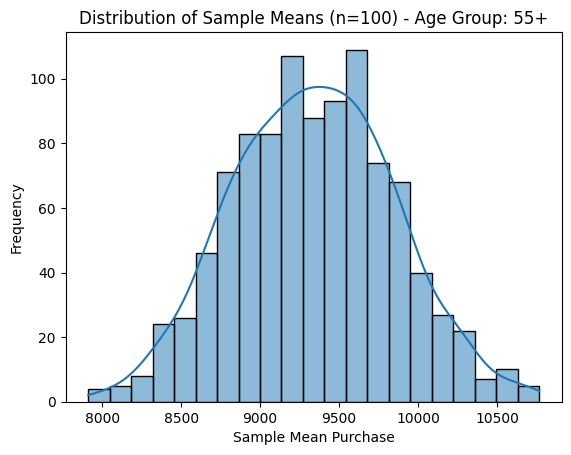

In [ ]:
# Looping through each age group and plotting the hisplot for sample means (n=100)

for age_group in sorted(df['Age'].unique()):
    group_data = df[df['Age'] == age_group]['Purchase']
    if len(group_data) >= 100:  # Ensure enough data
        sample_means_age = [np.mean(np.random.choice(group_data, 100, replace=True)) for _ in range(1000)]
        sns.histplot(sample_means_age, kde=True)
        plt.title(f"Distribution of Sample Means (n=100) - Age Group: {age_group}")
        plt.xlabel("Sample Mean Purchase")
        plt.ylabel("Frequency")
        plt.show()


**INSIGHTS:**

* The 18-25 age group shows higher average purchase amounts in smaller samples (e.g n=100), but the wider confidence intervals suggest greater variability and uncertainty in their spending behavior.

* The sample mean plots for ages show an approximately normal distribution, consistent with the Central Limit Theorem.

* As sample size increases, the confidence intervals across all age groups become narrower, as expected from the Central Limit Theorem. Age groups 26-35 and 36-45 consistently show higher and more stable average purchase amounts.

* The 0-17 age group consistently has lower average purchases and tight confidence intervals, suggesting that they spend less and exhibit more predictable behavior.

# **Final Summary & Business Recommendations**

## **Key Business Insights**

1. **Based on Gender:** The average purchase amount for male and female customers is slightly different. The confidence intervals (CI) for males and females partially overlap, indicating that while there are differences in average spending, they are not drastically different. This suggests no strong evidence that one gender spends significantly more than the other.

2. **Based on Marital Status:** The unmarried group showed slightly higher variability in spending compared to the married group. The confidence intervals overlap, which means marital status may not be a major factor influencing purchase behavior.

3. **Based on Age Group:** Customers in the 26-35 age groups tend to spend more on average. The 0-17 age group has the lowest spending, and CI analysis supports this. CI width becomes narrower with larger sample sizes, confirming the Central Limit Theorem (CLT) effect.

4. **From Heatmap and Pairplot:** Most features have weak or no correlation with Purchase. Product_Category has a negative correlation (~-0.34) with Purchase, which may indicate certain product categories are low-value items. Pairplot shows similar purchase distributions across genders, but some clustering in spending is visible based on occupation and product category.



## **Recommendations**
1. **Walmart should Focus on customers aged 26-35**, as they show higher average spending. Consider offering targeted promotions or loyalty programs for this segment.

2. **Re evaluate product categories with negative correlation** to purchase amounts. These could be bundled with higher ticket items or promoted with upselling strategies.

3. **Gender based promotions may not be necessary**, as both male and female spending behavior is relatively similar.

4. **Marital status is not a strong influencer**, so marketing strategies can be kept uniform across married and unmarried segments.

5. **It can use the CLT-based approach for A/B testing and pilot campaigns**. This helps in making quick, data-backed decisions on promotions or product launches by analyzing small representative samples instead of waiting for full-scale rollouts.